In [1]:
import requests
import pandas as pd
from icalendar import Calendar
from datetime import datetime
import pytz

def ical_to_dataframe(url):
    """
    Lädt einen iCal-Kalender von einer URL und konvertiert ihn zu einem DataFrame
    
    Args:
        url (str): URL zum iCal-Kalender
    
    Returns:
        pandas.DataFrame: DataFrame mit Kalenderdaten
    """
    
    # iCal-Daten von URL laden
    try:
        response = requests.get(url)
        response.raise_for_status()
        cal_data = response.text
    except requests.RequestException as e:
        print(f"Fehler beim Laden der URL: {e}")
        return None
    
    # iCal-Daten parsen
    try:
        cal = Calendar.from_ical(cal_data)
    except Exception as e:
        print(f"Fehler beim Parsen der iCal-Daten: {e}")
        return None
    
    # Events extrahieren
    events = []
    
    for component in cal.walk():
        if component.name == "VEVENT":
            event = {}
            
            # Grundlegende Event-Informationen
            event['summary'] = str(component.get('summary', ''))
            event['description'] = str(component.get('description', ''))
            event['location'] = str(component.get('location', ''))
            event['uid'] = str(component.get('uid', ''))
            
            # Datum und Zeit verarbeiten
            dtstart = component.get('dtstart')
            dtend = component.get('dtend')
            
            if dtstart:
                if hasattr(dtstart.dt, 'date'):
                    event['start_date'] = dtstart.dt.date() if hasattr(dtstart.dt, 'date') else dtstart.dt
                    event['start_time'] = dtstart.dt.time() if hasattr(dtstart.dt, 'time') else None
                    event['start_datetime'] = dtstart.dt
                else:
                    event['start_date'] = dtstart.dt
                    event['start_time'] = None
                    event['start_datetime'] = dtstart.dt
            else:
                event['start_date'] = None
                event['start_time'] = None
                event['start_datetime'] = None
            
            if dtend:
                if hasattr(dtend.dt, 'date'):
                    event['end_date'] = dtend.dt.date() if hasattr(dtend.dt, 'date') else dtend.dt
                    event['end_time'] = dtend.dt.time() if hasattr(dtend.dt, 'time') else None
                    event['end_datetime'] = dtend.dt
                else:
                    event['end_date'] = dtend.dt
                    event['end_time'] = None
                    event['end_datetime'] = dtend.dt
            else:
                event['end_date'] = None
                event['end_time'] = None
                event['end_datetime'] = None
            
            # Weitere optionale Felder
            event['created'] = component.get('created', '')
            event['last_modified'] = component.get('last-modified', '')
            event['status'] = str(component.get('status', ''))
            event['organizer'] = str(component.get('organizer', ''))
            
            events.append(event)
    
    # DataFrame erstellen
    if events:
        df = pd.DataFrame(events)
        # Datums-Spalten richtig formatieren
        date_columns = ['start_datetime', 'end_datetime', 'created', 'last_modified']
        for col in date_columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')
        
        return df
    else:
        print("Keine Events im Kalender gefunden")
        return pd.DataFrame()

def save_calendar_data(url, csv_filename='kalender_daten.csv'):
    """
    Lädt Kalenderdaten und speichert sie als CSV
    
    Args:
        url (str): URL zum iCal-Kalender
        csv_filename (str): Name der CSV-Datei
    
    Returns:
        pandas.DataFrame: DataFrame mit den Kalenderdaten
    """
    
    print(f"Lade Kalenderdaten von: {url}")
    df = ical_to_dataframe(url)
    
    if df is not None and not df.empty:
        # CSV speichern
        df.to_csv(csv_filename, index=False, encoding='utf-8')
        print(f"Kalenderdaten wurden in '{csv_filename}' gespeichert")
        print(f"Anzahl Events: {len(df)}")
        
        # Übersicht der Spalten anzeigen
        print("\nSpalten im DataFrame:")
        for col in df.columns:
            print(f"- {col}")
        
        # Erste paar Zeilen anzeigen
        print(f"\nErste 3 Events:")
        print(df[['summary', 'start_datetime', 'end_datetime', 'location']].head(3).to_string())
        
        return df
    else:
        print("Keine Daten zum Speichern gefunden")
        return pd.DataFrame()


In [2]:
calendar_urls = ["https://dhbw.app/ical/KA-TINF22B1", "https://dhbw.app/ical/KA-TINF22B2", "https://dhbw.app/ical/KA-TINF22B3", "https://dhbw.app/ical/KA-TINF22B4", "https://dhbw.app/ical/KA-TINF22B5", 
                 "https://dhbw.app/ical/KA-TINF22B6", "https://dhbw.app/ical/KA-TINF23B1", "https://dhbw.app/ical/KA-TINF23B2", "https://dhbw.app/ical/KA-TINF23B3", "https://dhbw.app/ical/KA-TINF23B4", 
                 "https://dhbw.app/ical/KA-TINF23B5", "https://dhbw.app/ical/KA-TINF23B6", "https://dhbw.app/ical/KA-TINF24B1", "https://dhbw.app/ical/KA-TINF24B2", "https://dhbw.app/ical/KA-TINF24B3", 
                 "https://dhbw.app/ical/KA-TINF24B4", "https://dhbw.app/ical/KA-TINF24B5", "https://dhbw.app/ical/KA-TINF24B6", "https://dhbw.app/ical/KA-TINF25B1", "https://dhbw.app/ical/KA-TINF25B2",
                 "https://dhbw.app/ical/KA-TINF25B3", "https://dhbw.app/ical/KA-TINF25B4", "https://dhbw.app/ical/KA-TINF25B5", "https://dhbw.app/ical/KA-TINF25B6", "https://dhbw.app/ical/KA-TEI24B1",
                 "https://dhbw.app/ical/KA-TEI24B2", "https://dhbw.app/ical/KA-TMB22KE1", "https://dhbw.app/ical/KA-TMB22KE2", "https://dhbw.app/ical/KA-TMB22PT", "https://dhbw.app/ical/KA-TMB23KE1",
                 "https://dhbw.app/ical/KA-TMB23KE2", "https://dhbw.app/ical/KA-TMB23PT", "https://dhbw.app/ical/KA-TMB24B1", "https://dhbw.app/ical/KA-TMB24B2", "https://dhbw.app/ical/KA-TMT22B1",
                 "https://dhbw.app/ical/KA-TMT23B2", "https://dhbw.app/ical/KA-TMT24B1", "https://dhbw.app/ical/KA-TMT24B2", "https://dhbw.app/ical/KA-TSST22B1", "https://dhbw.app/ical/KA-TSST22B1-AS",
                 "https://dhbw.app/ical/KA-TSST22B1-ST", "https://dhbw.app/ical/KA-TSST23B1", "https://dhbw.app/ical/KA-TSST23B1-AS", "https://dhbw.app/ical/KA-TSST23B1-ST", "https://dhbw.app/ical/KA-TSST23B1-UT",
                 "https://dhbw.app/ical/KA-TSST23B2", "https://dhbw.app/ical/KA-TSST23B2-PT", "https://dhbw.app/ical/KA-TSST23B2-VT", "https://dhbw.app/ical/KA-TSST24B1", "https://dhbw.app/ical/KA-TSST24B2",
                 "https://dhbw.app/ical/KA-TWIW22B1", "https://dhbw.app/ical/KA-TWIW22B2", "https://dhbw.app/ical/KA-TWIW23B1", "https://dhbw.app/ical/KA-TWIW24B1", "https://dhbw.app/ical/KA-TWIW24B2",
                 "https://dhbw.app/ical/KA-WBK22B2", "https://dhbw.app/ical/KA-WBK23B1", "https://dhbw.app/ical/KA-WBK23B2", "https://dhbw.app/ical/KA-WBK24B1", "https://dhbw.app/ical/KA-WBK24B2",
                 "https://dhbw.app/ical/KA-WDBM22B1", "https://dhbw.app/ical/KA-WDBM22B2", "https://dhbw.app/ical/KA-WDBM23B1", "https://dhbw.app/ical/KA-WDBM23B2", "https://dhbw.app/ical/KA-WDBM24B1",
                 "https://dhbw.app/ical/KA-WDBM24B2", "https://dhbw.app/ical/KA-WDCM22B", "https://dhbw.app/ical/KA-WDCM23B", "https://dhbw.app/ical/KA-WDCM24B", "https://dhbw.app/ical/KA-WHD22B1",
                 "https://dhbw.app/ical/KA-WHD22B2", "https://dhbw.app/ical/KA-WHD22B3", "https://dhbw.app/ical/KA-WHD22B4", "https://dhbw.app/ical/KA-WHD23B1", "https://dhbw.app/ical/KA-WHD23B2",
                 "https://dhbw.app/ical/KA-WHD23B3", "https://dhbw.app/ical/KA-WHD23B4", "https://dhbw.app/ical/KA-WHD24B1", "https://dhbw.app/ical/KA-WHD24B2", "https://dhbw.app/ical/KA-WHD24B3",
                 "https://dhbw.app/ical/KA-WHD24B4", "https://dhbw.app/ical/KA-WIN22B1", "https://dhbw.app/ical/KA-WIN22B2", "https://dhbw.app/ical/KA-WIN22B3", "https://dhbw.app/ical/KA-WIN23B1",
                 "https://dhbw.app/ical/KA-WIN23B2", "https://dhbw.app/ical/KA-WIN23B3", "https://dhbw.app/ical/KA-WIN24B1", "https://dhbw.app/ical/KA-WIN24B2", "https://dhbw.app/ical/KA-WIN24B3",
                 "https://dhbw.app/ical/KA-WVS22B1", "https://dhbw.app/ical/KA-WVS23B1", "https://dhbw.app/ical/KA-WVS24B1", "https://dhbw.app/ical/KA-WDS24B", "https://dhbw.app/ical/KA-WDFM22B",
                 "https://dhbw.app/ical/KA-WSP22B", "https://dhbw.app/ical/KA-WSP23B", "https://dhbw.app/ical/KA-WSP24B", "https://dhbw.app/ical/KA-WUN22B1", "https://dhbw.app/ical/KA-WUN23B1",
                 "https://dhbw.app/ical/KA-WUN24B1", "https://dhbw.app/ical/KA-WWI22B1", "https://dhbw.app/ical/KA-WWI22B2", "https://dhbw.app/ical/KA-WWI22B3", "https://dhbw.app/ical/KA-WWI22B4",
                 "https://dhbw.app/ical/KA-WWI22B5", "https://dhbw.app/ical/KA-WWI23B1", "https://dhbw.app/ical/KA-WWI23B2", "https://dhbw.app/ical/KA-WWI23B3", "https://dhbw.app/ical/KA-WWI23B4",
                 "https://dhbw.app/ical/KA-WWI23B5", "https://dhbw.app/ical/KA-WWI24B1", "https://dhbw.app/ical/KA-WWI24B2", "https://dhbw.app/ical/KA-WWI24B3", "https://dhbw.app/ical/KA-WWI24B4",
                 "https://dhbw.app/ical/KA-GWAG22B1", "https://dhbw.app/ical/KA-GWAG23B1", "https://dhbw.app/ical/KA-GWAH22B1", "https://dhbw.app/ical/KA-GWAH23B1", "https://dhbw.app/ical/KA-GWAH24B1",
                 "https://dhbw.app/ical/KA-GAGPW24B1", "https://dhbw.app/ical/KA-GTPA22B1", "https://dhbw.app/ical/KA-GTPA22B2", "https://dhbw.app/ical/KA-INTERNATIONAL-STUDENTS"]
    
    # Leeres DataFrame erstellen
df = pd.DataFrame()

# Durch alle URLs iterieren und Daten zusammenführen
for calendar_url in calendar_urls:
    print(f"Verarbeite: {calendar_url}")
    temp_df = ical_to_dataframe(calendar_url)
    
    if temp_df is not None and not temp_df.empty:
        # Kursnamen aus der URL extrahieren
        kurs = calendar_url.strip().split("/")[-1]
        temp_df["Kurs"] = kurs
        
        # DataFrames zusammenführen
        df = pd.concat([df, temp_df], ignore_index=True)
    else:
        print(f"Keine Daten für URL: {calendar_url}")

# CSV speichern
if not df.empty:
    df.to_csv('dhbw_kalender.csv', index=False, encoding='utf-8')
    print(f"\nGesamtdaten wurden in 'dhbw_kalender.csv' gespeichert")
    print(f"Anzahl Events insgesamt: {len(df)}")
else:
    print("Keine Daten zum Speichern gefunden")

Verarbeite: https://dhbw.app/ical/KA-TINF22B1
Verarbeite: https://dhbw.app/ical/KA-TINF22B2
Verarbeite: https://dhbw.app/ical/KA-TINF22B3
Verarbeite: https://dhbw.app/ical/KA-TINF22B4
Verarbeite: https://dhbw.app/ical/KA-TINF22B5
Verarbeite: https://dhbw.app/ical/KA-TINF22B6
Verarbeite: https://dhbw.app/ical/KA-TINF23B1
Verarbeite: https://dhbw.app/ical/KA-TINF23B2
Verarbeite: https://dhbw.app/ical/KA-TINF23B3
Verarbeite: https://dhbw.app/ical/KA-TINF23B4
Verarbeite: https://dhbw.app/ical/KA-TINF23B5
Verarbeite: https://dhbw.app/ical/KA-TINF23B6
Verarbeite: https://dhbw.app/ical/KA-TINF24B1
Verarbeite: https://dhbw.app/ical/KA-TINF24B2
Verarbeite: https://dhbw.app/ical/KA-TINF24B3
Verarbeite: https://dhbw.app/ical/KA-TINF24B4
Verarbeite: https://dhbw.app/ical/KA-TINF24B5
Verarbeite: https://dhbw.app/ical/KA-TINF24B6
Verarbeite: https://dhbw.app/ical/KA-TINF25B1
Verarbeite: https://dhbw.app/ical/KA-TINF25B2
Verarbeite: https://dhbw.app/ical/KA-TINF25B3
Verarbeite: https://dhbw.app/ical/

In [10]:
df_cleaned = df.drop_duplicates(
    subset=["summary", "start_date", "start_time", "end_date", "end_time"],
    keep="first"
)

df_2025 = df_cleaned[df_cleaned['start_date'].dt.year == 2025]
df_2025.tail(30)



AttributeError: Can only use .dt accessor with datetimelike values

Starte Mensa-Besucheranalyse...
Analysiere 31437 Vorlesungseinträge...
MENSA-BESUCHERANALYSE - ERGEBNISSE

📊 GESAMTSTATISTIKEN:
   • Kurse mit potenzieller Mittagspause: 111
   • Durchschnittliche tägliche Mensa-Besucher: 3.8
   • Hauptstoßzeit: 12:00-13:00 (2307 Kurse)

📅 TÄGLICHE AUFSCHLÜSSELUNG:
   2023-05-01: 0/6 Kurse könnten zur Mensa
   2023-05-18: 0/6 Kurse könnten zur Mensa
   2023-05-29: 0/5 Kurse könnten zur Mensa
   2023-06-02: 1/16 Kurse könnten zur Mensa
   2023-06-05: 6/19 Kurse könnten zur Mensa
   2023-06-06: 3/15 Kurse könnten zur Mensa
   2023-06-07: 3/18 Kurse könnten zur Mensa
   2023-06-08: 0/7 Kurse könnten zur Mensa
   2023-06-09: 1/13 Kurse könnten zur Mensa
   2023-06-12: 5/17 Kurse könnten zur Mensa
   2023-06-13: 3/17 Kurse könnten zur Mensa
   2023-06-14: 7/17 Kurse könnten zur Mensa
   2023-06-15: 3/18 Kurse könnten zur Mensa
   2023-06-16: 0/14 Kurse könnten zur Mensa
   2023-06-19: 2/18 Kurse könnten zur Mensa
   2023-06-20: 4/16 Kurse könnten zur Mensa


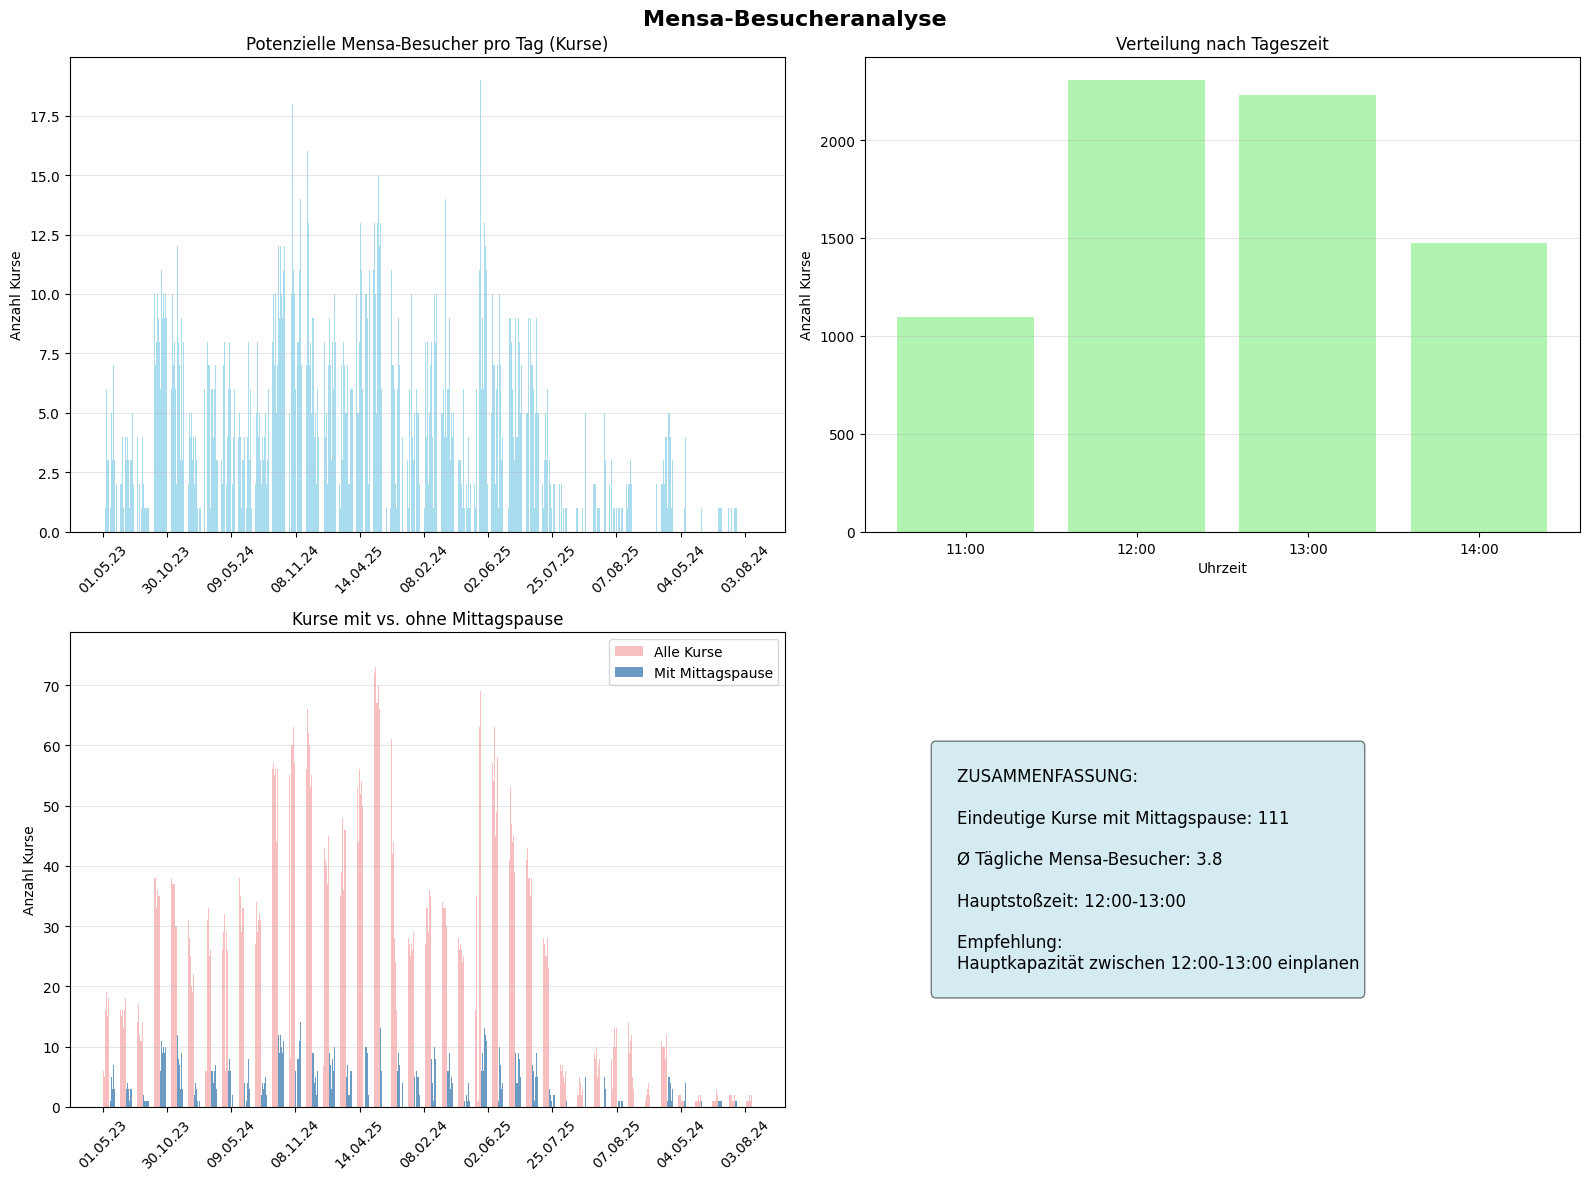

{'daily_stats': [{'date': datetime.date(2023, 5, 1),
   'total_courses': 6,
   'potential_mensa_visitors': 0,
   'lunch_break_times': []},
  {'date': datetime.date(2023, 5, 18),
   'total_courses': 6,
   'potential_mensa_visitors': 0,
   'lunch_break_times': []},
  {'date': datetime.date(2023, 5, 29),
   'total_courses': 5,
   'potential_mensa_visitors': 0,
   'lunch_break_times': []},
  {'date': datetime.date(2023, 6, 2),
   'total_courses': 16,
   'potential_mensa_visitors': 1,
   'lunch_break_times': [{'course': 'KA-WWI22B1',
     'break_start': datetime.time(12, 0),
     'break_end': datetime.time(14, 0)}]},
  {'date': datetime.date(2023, 6, 5),
   'total_courses': 19,
   'potential_mensa_visitors': 6,
   'lunch_break_times': [{'course': 'KA-TWIW22B2',
     'break_start': datetime.time(10, 30),
     'break_end': datetime.time(14, 0)},
    {'course': 'KA-TMT22B1',
     'break_start': datetime.time(12, 0),
     'break_end': datetime.time(15, 15)},
    {'course': 'KA-WHD22B2',
     'b

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime, time
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_mensa_potential(df):
    """
    Analysiert das Potenzial für Mensa-Besuche basierend auf Vorlesungszeiten
    
    Args:
        df: DataFrame mit Vorlesungsdaten
    
    Returns:
        dict: Ergebnisse der Analyse
    """
    
    # Kopie des DataFrames erstellen
    df = df.copy()
    
    # Datum-Zeit Spalten konvertieren falls sie noch Strings sind
    datetime_cols = ['start_datetime', 'end_datetime']
    for col in datetime_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col])
    
    # Datum extrahieren für Gruppierung
    df['date'] = df['start_datetime'].dt.date
    
    # Mittagspause definieren (11:30 - 14:00)
    lunch_start = time(11, 30)
    lunch_end = time(14, 0)
    
    # Vormittag (bis 11:30) und Nachmittag (ab 14:00) definieren
    morning_end = time(11, 30)
    afternoon_start = time(14, 0)
    
    # Ergebnisse speichern
    results = {
        'daily_stats': [],
        'hourly_stats': {},
        'students_with_lunch_break': [],
        'total_analysis': {}
    }
    
    # Analyse pro Tag
    for date in df['date'].unique():
        daily_data = df[df['date'] == date].copy()
        
        # Kurse identifizieren (falls Kurs-Info verfügbar)
        courses_today = set()
        if 'Kurs' in daily_data.columns:
            courses_today = set(daily_data['Kurs'].dropna())
        else:
            # Fallback: jede Veranstaltung als einen "Kurs" zählen
            courses_today = set(daily_data.index)
        
        daily_stats = {
            'date': date,
            'total_courses': len(courses_today),
            'potential_mensa_visitors': 0,
            'lunch_break_times': []
        }
        
        # Für jeden Kurs prüfen
        courses_with_break = []
        
        for course in courses_today:
            if 'Kurs' in daily_data.columns:
                course_schedule = daily_data[daily_data['Kurs'] == course]
            else:
                course_schedule = daily_data[daily_data.index == course]
            
            # Zeiten extrahieren
            start_times = course_schedule['start_datetime'].dt.time
            end_times = course_schedule['end_datetime'].dt.time
            
            # Prüfen ob Kurs Vormittags UND Nachmittags Vorlesungen hat
            has_morning = any(t <= morning_end for t in start_times)
            has_afternoon = any(t >= afternoon_start for t in start_times)
            
            if has_morning and has_afternoon:
                # Kurs hat potenzielle Mittagspause
                daily_stats['potential_mensa_visitors'] += 1
                courses_with_break.append(course)
                
                # Mögliche Pausenzeiten berechnen
                morning_end_time = max([t for t in end_times if t <= time(13, 0)], default=time(11, 30))
                afternoon_start_time = min([t for t in start_times if t >= time(12, 0)], default=time(14, 0))
                
                if morning_end_time < afternoon_start_time:
                    daily_stats['lunch_break_times'].append({
                        'course': course,
                        'break_start': morning_end_time,
                        'break_end': afternoon_start_time
                    })
        
        results['daily_stats'].append(daily_stats)
        results['students_with_lunch_break'].extend(courses_with_break)
    
    # Stündliche Analyse - wann gehen Kurse zur Mensa
    lunch_hours = list(range(11, 15))  # 11:00 - 14:59
    hourly_counts = {hour: 0 for hour in lunch_hours}
    
    for day_stat in results['daily_stats']:
        for break_info in day_stat['lunch_break_times']:
            break_start_hour = break_info['break_start'].hour
            break_end_hour = break_info['break_end'].hour
            
            # Kurse können zwischen break_start und break_end zur Mensa
            for hour in range(max(11, break_start_hour), min(15, break_end_hour + 1)):
                if hour in hourly_counts:
                    hourly_counts[hour] += 1
    
    results['hourly_stats'] = hourly_counts
    
    # Gesamtstatistiken
    total_courses = len(set(results['students_with_lunch_break']))
    avg_daily_visitors = np.mean([day['potential_mensa_visitors'] for day in results['daily_stats']])
    peak_hour = max(hourly_counts.items(), key=lambda x: x[1]) if hourly_counts else (12, 0)
    
    results['total_analysis'] = {
        'total_unique_courses_with_break': total_courses,
        'avg_daily_mensa_potential': round(avg_daily_visitors, 1),
        'peak_hour': f"{peak_hour[0]}:00-{peak_hour[0]+1}:00",
        'peak_hour_count': peak_hour[1]
    }
    
    return results

def print_results(results):
    """Druckt die Analyseergebnisse formatiert aus"""
    
    print("=" * 60)
    print("MENSA-BESUCHERANALYSE - ERGEBNISSE")
    print("=" * 60)
    
    # Gesamtstatistiken
    total = results['total_analysis']
    print(f"\n📊 GESAMTSTATISTIKEN:")
    print(f"   • Kurse mit potenzieller Mittagspause: {total['total_unique_courses_with_break']}")
    print(f"   • Durchschnittliche tägliche Mensa-Besucher: {total['avg_daily_mensa_potential']}")
    print(f"   • Hauptstoßzeit: {total['peak_hour']} ({total['peak_hour_count']} Kurse)")
    
    # Tägliche Aufschlüsselung
    print(f"\n📅 TÄGLICHE AUFSCHLÜSSELUNG:")
    for day in results['daily_stats']:
        print(f"   {day['date']}: {day['potential_mensa_visitors']}/{day['total_courses']} Kurse könnten zur Mensa")
    
    # Stündliche Verteilung
    print(f"\n🕐 STÜNDLICHE VERTEILUNG (Mittagszeit):")
    for hour, count in results['hourly_stats'].items():
        bar = "█" * min(count, 50)  # Balkendiagramm in der Konsole
        print(f"   {hour:02d}:00-{hour+1:02d}:00: {count:3d} Kurse {bar}")

def create_visualizations(results):
    """Erstellt Visualisierungen der Ergebnisse"""
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Mensa-Besucheranalyse', fontsize=16, fontweight='bold')
    
    # 1. Tägliche potenzielle Besucher
    daily_data = results['daily_stats']
    dates = [day['date'].strftime('%d.%m.%y') for day in daily_data]  # Mit Jahr
    visitors = [day['potential_mensa_visitors'] for day in daily_data]
    
    x_pos1 = np.arange(len(dates))
    ax1.bar(x_pos1, visitors, color='skyblue', alpha=0.7)
    ax1.set_title('Potenzielle Mensa-Besucher pro Tag (Kurse)', fontsize=12)
    ax1.set_ylabel('Anzahl Kurse')
    
    # Nur jeden 5. oder 10. Wert anzeigen (je nach Datenmenge)
    step = max(1, len(dates) // 10)  # Maximal 10 Labels
    tick_positions = x_pos1[::step]
    tick_labels = [dates[i] for i in range(0, len(dates), step)]
    
    ax1.set_xticks(tick_positions)
    ax1.set_xticklabels(tick_labels, rotation=45, fontsize=10)
    ax1.grid(axis='y', alpha=0.3)
    
    # 2. Stündliche Verteilung
    hours = list(results['hourly_stats'].keys())
    counts = list(results['hourly_stats'].values())
    
    ax2.bar(hours, counts, color='lightgreen', alpha=0.7)
    ax2.set_title('Verteilung nach Tageszeit', fontsize=12)
    ax2.set_xlabel('Uhrzeit')
    ax2.set_ylabel('Anzahl Kurse')
    ax2.set_xticks(hours)
    ax2.set_xticklabels([f'{h}:00' for h in hours])
    ax2.grid(axis='y', alpha=0.3)
    
    # 3. Verhältnis Mensa-Besucher zu Gesamtkursen
    total_courses = [day['total_courses'] for day in daily_data]
    mensa_courses = visitors
    
    x_pos3 = np.arange(len(dates))  # Numerische Positionen für die Balken
    width = 0.35  # Breite der Balken
    
    ax3.bar(x_pos3 - width/2, total_courses, width, label='Alle Kurse', alpha=0.5, color='lightcoral')
    ax3.bar(x_pos3 + width/2, mensa_courses, width, label='Mit Mittagspause', alpha=0.8, color='steelblue')
    ax3.set_title('Kurse mit vs. ohne Mittagspause', fontsize=12)
    ax3.set_ylabel('Anzahl Kurse')
    
    # Gleiche Tick-Positionen wie oben verwenden
    ax3.set_xticks(tick_positions)
    ax3.set_xticklabels(tick_labels, rotation=45, fontsize=10)
    ax3.legend()
    ax3.grid(axis='y', alpha=0.3)
    ax3.legend()
    ax3.tick_params(axis='x', rotation=45)
    
    # 4. Zusammenfassung als Text
    ax4.axis('off')
    summary_text = f"""
    ZUSAMMENFASSUNG:
    
    Eindeutige Kurse mit Mittagspause: {results['total_analysis']['total_unique_courses_with_break']}
    
    Ø Tägliche Mensa-Besucher: {results['total_analysis']['avg_daily_mensa_potential']}
    
    Hauptstoßzeit: {results['total_analysis']['peak_hour']}
    
    Empfehlung: 
    Hauptkapazität zwischen 12:00-13:00 einplanen
    """
    
    ax4.text(0.1, 0.5, summary_text, fontsize=12, verticalalignment='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.5))
    
    plt.tight_layout()
    plt.show()

# Hauptfunktion
def main(df_path_or_dataframe):
    """
    Hauptfunktion zur Durchführung der Mensa-Analyse
    
    Args:
        df_path_or_dataframe: Pfad zur CSV-Datei oder pandas DataFrame
    """
    
    # DataFrame laden falls Pfad übergeben wurde
    if isinstance(df_path_or_dataframe, str):
        df = pd.read_csv(df_path_or_dataframe)
    else:
        df = df_path_or_dataframe.copy()
    
    print("Starte Mensa-Besucheranalyse...")
    print(f"Analysiere {len(df)} Vorlesungseinträge...")
    
    # Analyse durchführen
    results = analyze_mensa_potential(df)
    
    # Ergebnisse ausgeben
    print_results(results)
    
    # Visualisierungen erstellen
    try:
        create_visualizations(results)
    except Exception as e:
        print(f"\nHinweis: Visualisierungen konnten nicht erstellt werden: {e}")
    
    return results



main(df_cleaned)